In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate 
from sklearn import cluster
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
veh_data=pd.read_csv("DS1_C9_S6_Practice_Vehicle_Data.csv")
veh_data

,Manufacturer,Model,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,Passenger,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,Passenger,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,Passenger,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,Passenger,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,Passenger,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,Passenger,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,Passenger,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,Passenger,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,Passenger,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [3]:
Num_col=veh_data.select_dtypes(exclude="object")
Num_col

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...
152,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [4]:
Num_col.isnull().sum()

Engine_size          1
Horsepower           1
Wheelbase            1
Width                1
Length               1
Curb_weight          2
Fuel_capacity        1
Fuel_efficiency      3
Power_perf_factor    2
dtype: int64

In [5]:
for i in Num_col.columns:
    Num_col[i]=Num_col[i].fillna(Num_col[i].mean())

In [6]:
Num_col.isnull().sum()

Engine_size          0
Horsepower           0
Wheelbase            0
Width                0
Length               0
Curb_weight          0
Fuel_capacity        0
Fuel_efficiency      0
Power_perf_factor    0
dtype: int64

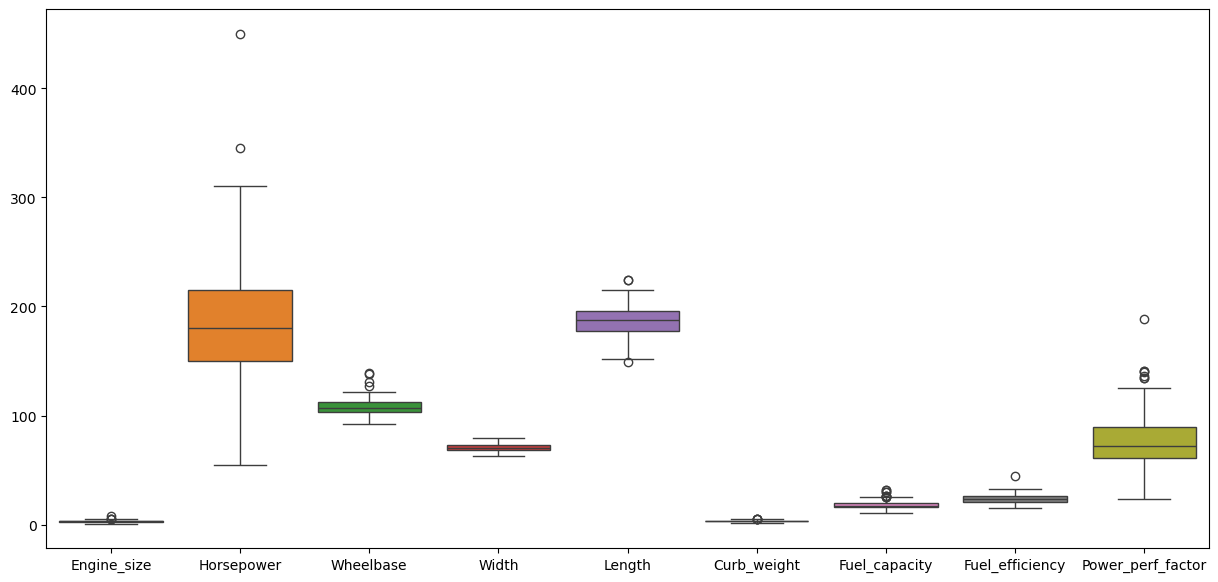

In [7]:
sns.boxplot(data=Num_col)
plt.gcf().set_size_inches(15,7)

In [8]:
def iqr_winsorization(df):
    df_c=df.copy()
    col_to_treat=Num_col.columns
    for col in col_to_treat:
        Q1=df_c[col].quantile(0.25)
        Q2=df_c[col].quantile(0.50)
        Q3=df_c[col].quantile(0.75)
        IQR=Q3-Q1
        UF=Q3+1.5*IQR
        LF=Q1-1.5*IQR
        df_c.loc[df_c[col]>UF,col]=UF
        df_c.loc[df_c[col]<LF,col]=LF
    return df_c
df=pd.DataFrame(Num_col)
treated_df=iqr_winsorization(df.copy())

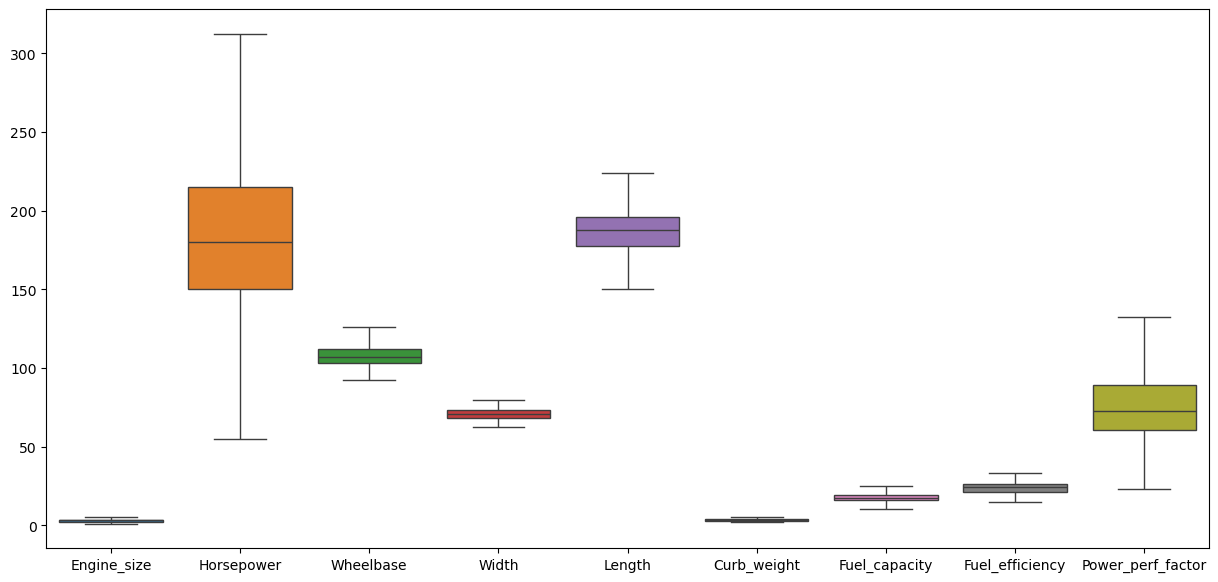

In [9]:
sns.boxplot(data=treated_df)
plt.gcf().set_size_inches(15,7)

In [10]:
corr=abs(treated_df.corr()>=0.7)
corr

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Engine_size,True,True,False,True,False,True,True,False,True
Horsepower,True,True,False,False,False,False,False,False,True
Wheelbase,False,False,True,False,True,False,False,False,False
Width,True,False,False,True,True,True,False,False,False
Length,False,False,True,True,True,False,False,False,False
Curb_weight,True,False,False,True,False,True,True,False,False
Fuel_capacity,True,False,False,False,False,True,True,False,False
Fuel_efficiency,False,False,False,False,False,False,False,True,False
Power_perf_factor,True,True,False,False,False,False,False,False,True


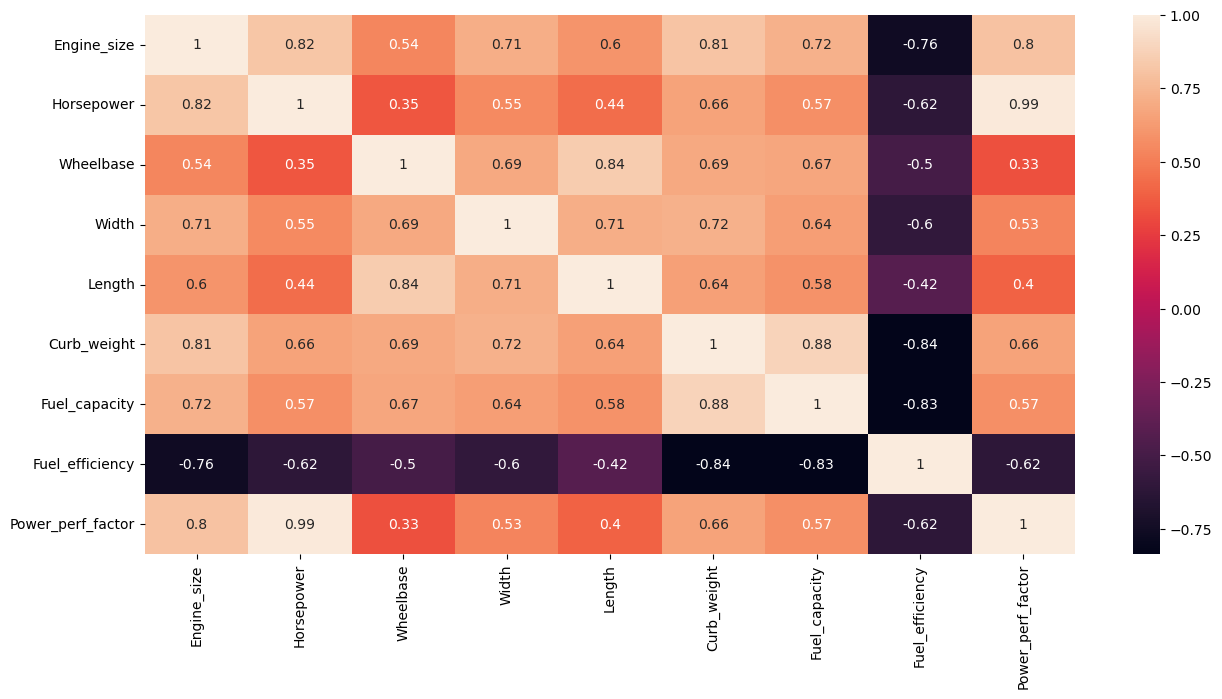

In [11]:
sns.heatmap(treated_df.corr(),annot=True)
plt.gcf().set_size_inches(15,7)

In [12]:
treated_df=treated_df.drop(["Fuel_capacity","Power_perf_factor"],axis=1)
treated_df

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_efficiency
0,1.8,140.0,101.2,67.3,172.4,2.639,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,25.0
2,3.2,225.0,106.9,70.6,192.0,3.470,26.0
3,3.5,210.0,114.6,71.4,196.6,3.850,22.0
4,1.8,150.0,102.6,68.2,178.0,2.998,27.0
...,...,...,...,...,...,...,...
152,1.9,160.0,100.5,67.6,176.6,3.042,25.0
153,2.4,168.0,104.9,69.3,185.9,3.208,25.0
154,2.4,168.0,104.9,69.3,186.2,3.259,25.0
155,2.3,236.0,104.9,71.5,185.7,3.601,23.0


In [13]:
scale=StandardScaler()
df_scaled=scale.fit_transform(treated_df)
df_scaled=pd.DataFrame(df_scaled,columns=treated_df.columns)
df_scaled

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_efficiency
0,-1.286724,-0.852221,-0.878521,-1.122510,-1.121607,-1.226153,1.070331
1,0.168414,0.762340,0.117309,-0.247827,0.417403,0.250315,0.311068
2,0.168414,0.762340,-0.055879,-0.160359,0.349837,0.171279,0.564156
3,0.480229,0.477418,1.055409,0.072890,0.695176,0.810297,-0.448195
4,-1.286724,-0.662272,-0.676468,-0.860105,-0.701195,-0.622449,0.817243
...,...,...,...,...,...,...,...
152,-1.182785,-0.472324,-0.979547,-1.035041,-0.806298,-0.548457,0.311068
153,-0.663093,-0.320365,-0.344525,-0.539388,-0.108113,-0.269307,0.311068
154,-0.663093,-0.320365,-0.344525,-0.539388,-0.085590,-0.183544,0.311068
155,-0.767032,0.971284,-0.344525,0.102046,-0.123127,0.391572,-0.195107


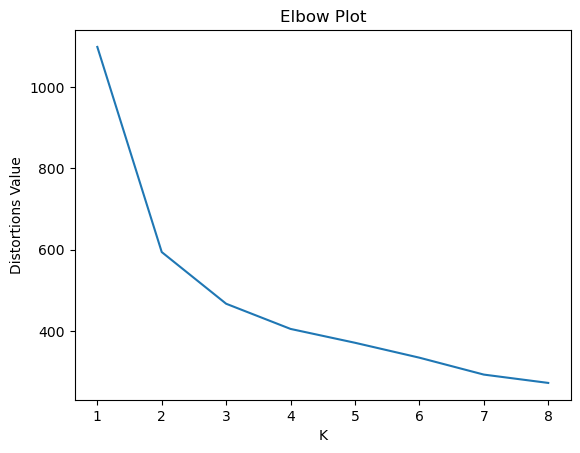

In [14]:
Distortions=[]
for i in range(1,9):
    KMeans_model=KMeans(n_clusters=i)
    KMeans_model.fit(df_scaled)
    Distortions.append(KMeans_model.inertia_)
plt.plot(range(1,9),Distortions,)
plt.title("Elbow Plot")
plt.xlabel("K")
plt.ylabel("Distortions Value")
plt.show()

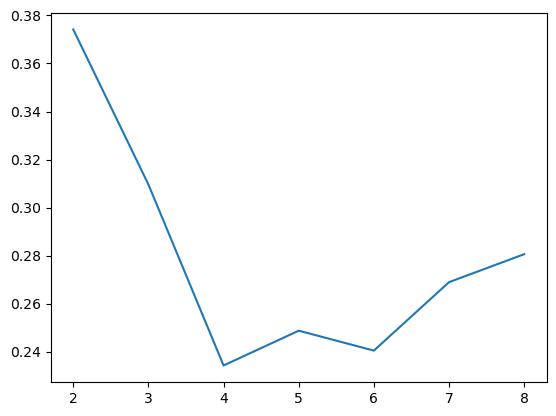

In [15]:
from sklearn.metrics import silhouette_score
sil_score=[]
for i in range(2,9):
    sil_score.append(silhouette_score(df_scaled,KMeans(n_clusters=i,random_state=10).fit_predict(df_scaled)))
plt.plot(range(2,9),sil_score)
plt.show()

# The Optimum K Value is  2

In [17]:
KMean_model=KMeans(n_clusters=2,random_state=10)
KMean_model.fit(df_scaled)

KMeans(n_clusters=2, random_state=10)

In [18]:
KMean_centroid=KMean_model.cluster_centers_
print(KMean_centroid)

[[ 0.66684026  0.57506214  0.60934395  0.65446851  0.60645064  0.69414721
  -0.54784427]
 [-0.78724197 -0.6788928  -0.71936439 -0.77263644 -0.71594867 -0.81947934
   0.6467606 ]]


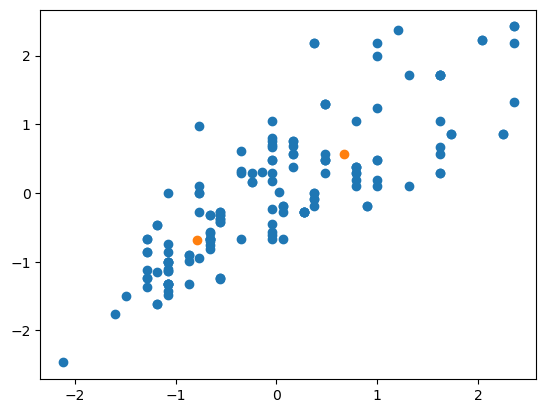

In [19]:
plt.scatter(df_scaled["Engine_size"],df_scaled["Horsepower"])
plt.scatter(KMean_centroid[:,0],KMean_centroid[:,1])
plt.show()

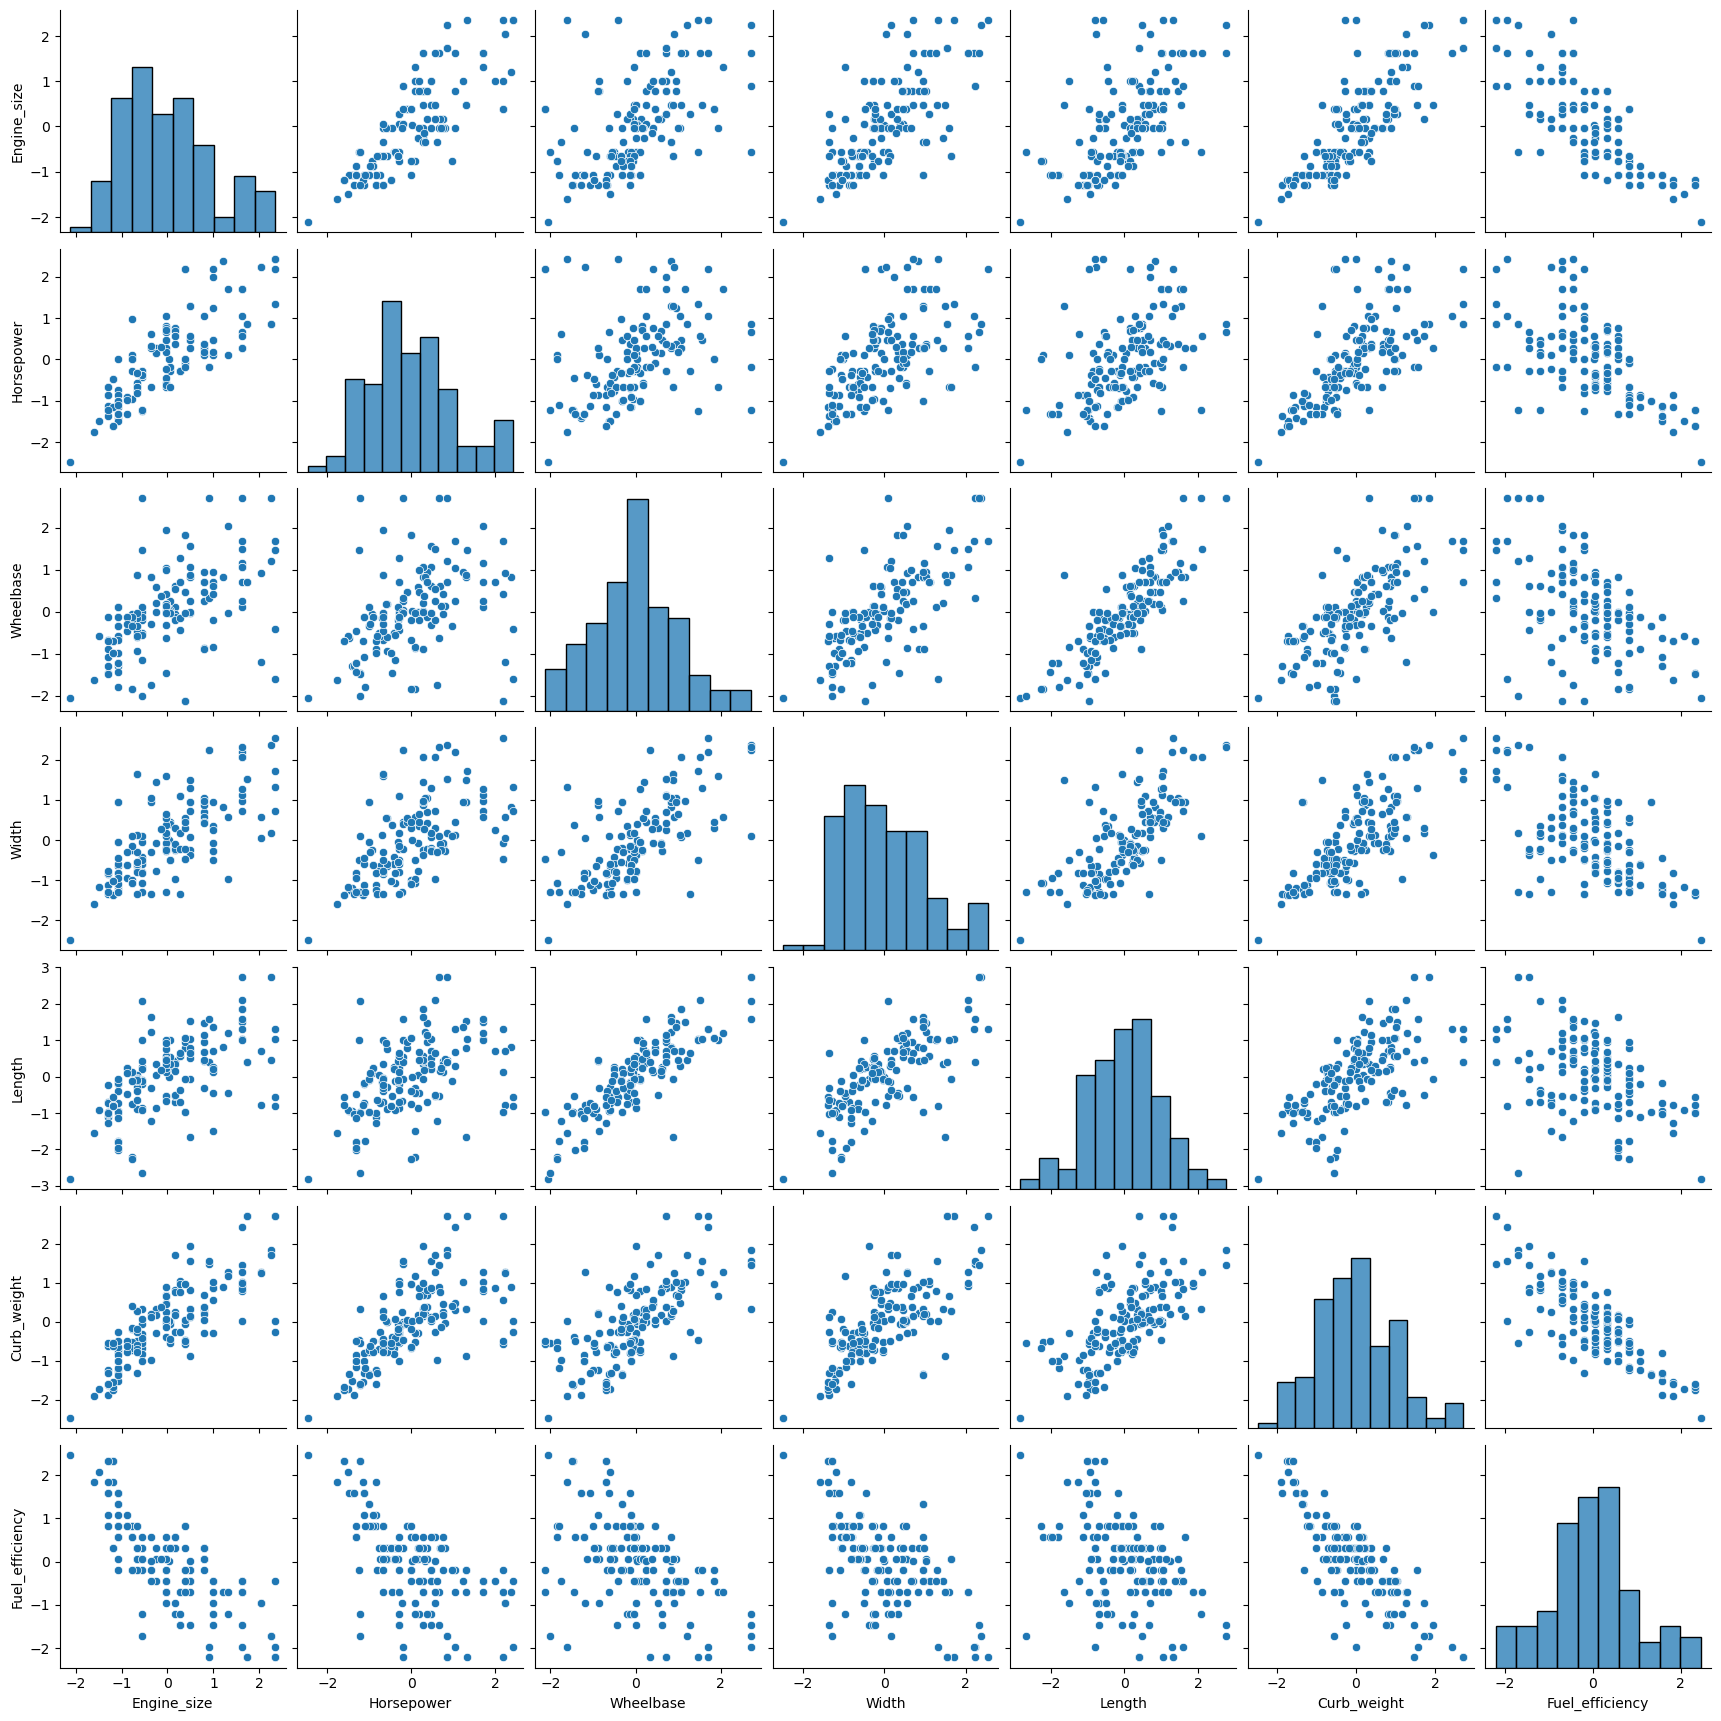

In [20]:
sns.pairplot(data=df_scaled,kind="scatter")
plt.show()

In [21]:
labels=KMean_model.labels_
labels

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0])

In [22]:
Labels_df=pd.DataFrame(labels,columns=["Label"])
Labels_df

,Label
0,1
1,0
2,0
3,0
4,1
...,...
152,1
153,1
154,1
155,0


In [23]:
new_df=pd.concat([veh_data,Labels_df],axis=1)
new_df

,Manufacturer,Model,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Label
0,Acura,Integra,Passenger,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150,1
1,Acura,TL,Passenger,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778,0
2,Acura,CL,Passenger,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN,0
3,Acura,RL,Passenger,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779,0
4,Audi,A4,Passenger,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,Passenger,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,1
153,Volvo,S70,Passenger,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,1
154,Volvo,V70,Passenger,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,1
155,Volvo,C70,Passenger,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,0


In [24]:
new_df.groupby(["Model"])["Label"].unique()

Model
03-Sep      [1]
05-Sep      [1]
3000GT      [1]
300M        [0]
323i        [1]
           ... 
Viper       [0]
Voyager     [0]
Windstar    [0]
Wrangler    [1]
Xterra      [0]
Name: Label, Length: 156, dtype: object

In [25]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
calinski_score=calinski_harabasz_score(df_scaled,Labels_df)
calinski_score

131.7887640541023

In [55]:
from sklearn.metrics import davies_bouldin_score
davies_score=davies_bouldin_score(df_scaled,Labels_df)
davies_score

0.979019427442689

In [57]:
silhouette_score=silhouette_score(df_scaled,KMeans(n_clusters=2,random_state=10).fit_predict(df_scaled))
silhouette_score

0.37413516535081065

The Calinski harabasz index of 131.78 that the model is moderately seperated and the cluster isnt ideal
Davies bouldin score is almost 1 which indicates clusters are less distict or more similar to each other
silhouette score of 0.37 indicates that the clusters might be overlapping or the points are on the multiple boundaries
The model in overall is performing poorly, but not the worst one. The points arent clustered perfectly.